In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pal = sns.color_palette()

In [ ]:
print('Numpy version: ', np.__version__)
print('Pandas version: ', pd.__version__)
print('Seaborn version: ', sns.__version__)

Numpy version:  1.21.6
Pandas version:  1.3.5
Seaborn version:  0.11.2


In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 7
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('/content/Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df1 = df.drop('ID', axis=1)

In [ ]:
num_dtypes= ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df1.select_dtypes(include = num_dtypes)
numericals = num_df.columns
print(numericals)

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [ ]:
cat_dtypes= ['object']
cat_df = df.select_dtypes(include = cat_dtypes)
categoricals = cat_df.columns
print(categoricals)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


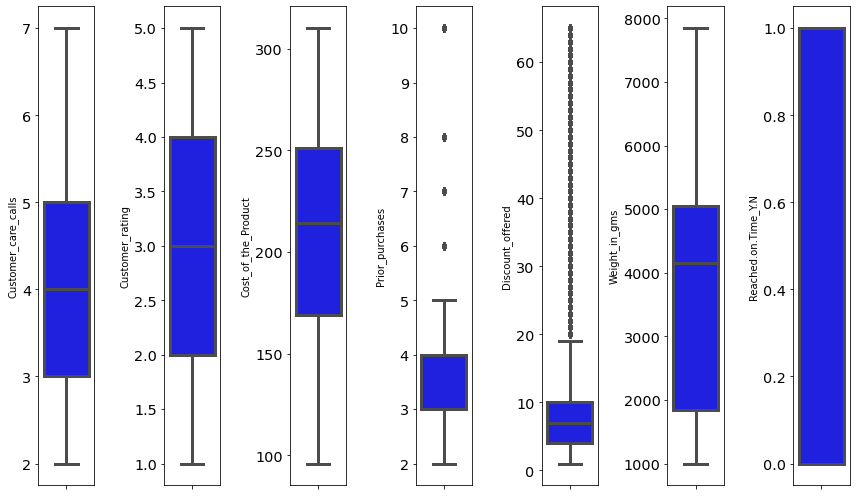

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y = df[features[i]], color='blue', orient='v')
  plt.tight_layout()

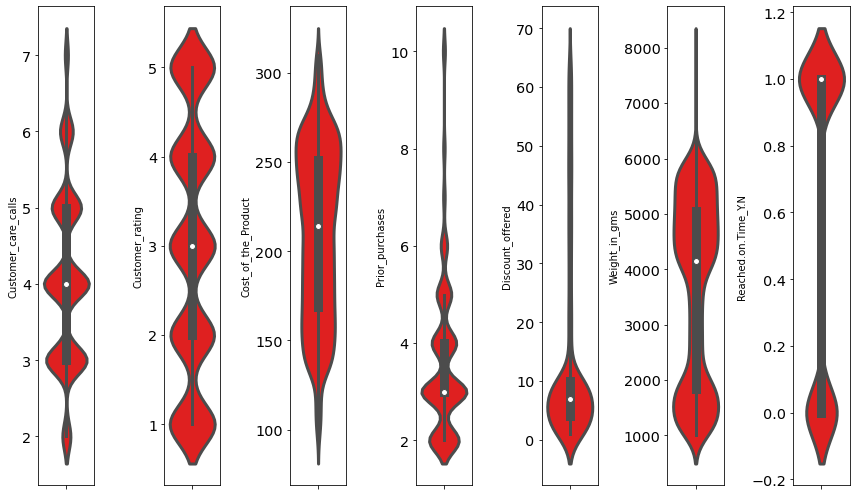

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.violinplot(y = df[features[i]], color='red')
  plt.tight_layout()

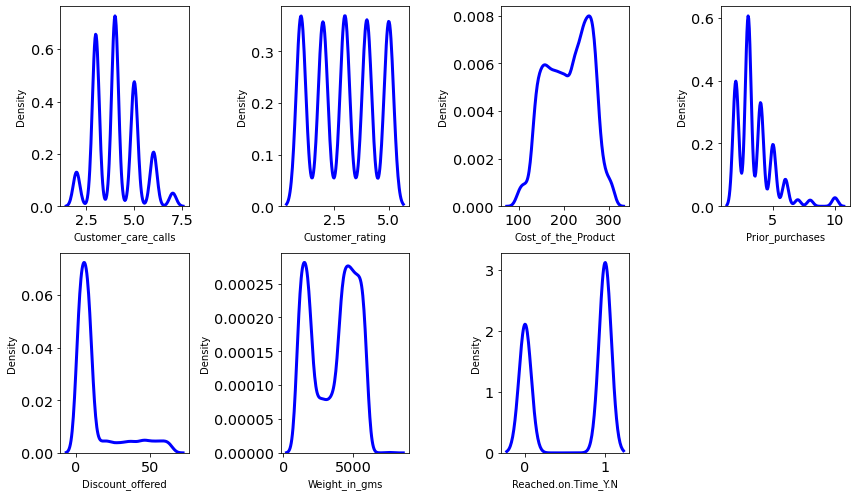

In [ ]:
features = numericals
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.kdeplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

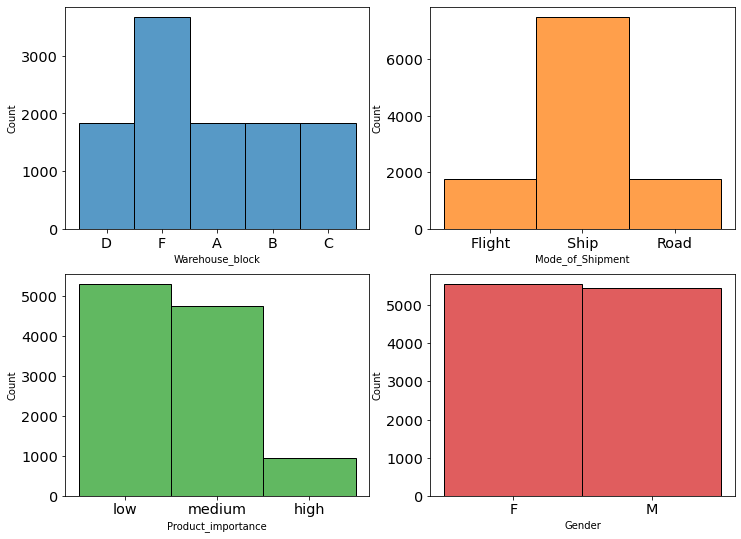

In [ ]:
plt.figure(figsize = (12, 9))
for i, num in enumerate(categoricals):

    plt.subplot(2,2, i+1)
    sns.histplot(df[num], color=pal[i])
    
plt.show()


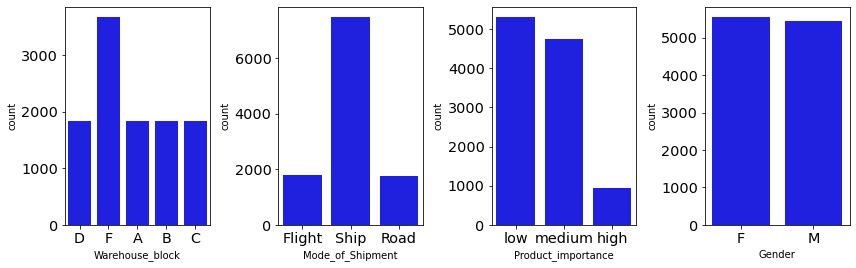

In [ ]:
features = categoricals
for i in range(0, len(features)):
  plt.subplot(2,4, i+1)
  sns.countplot(x = df[features[i]], color='blue')
  plt.xlabel(features[i])
  plt.tight_layout()

Dapat disimpulkan bahwa outlier pada feature discount_offered dan prior_purchases, distribusi data tergolong normal pada feature customer_rating, positive skewed pada discount_offered dan prior_purchases, bimodal pada feature Reached.on.Time_T.n. Yang harus diperhatikan pada saat data pre-processing adalah pada feature discount_offered dan prior_purchases karena memiliki outlier. Terdapat pula nilai dominan pada feature warehouse_block dimana label F memiliki value count yang dominan diantara yang lain dan juga feature mode_of_shipment karena label Ship memiliki value count yang dominan dan paling tinggi diantara yang lain.